In [1102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [1103]:
df = pd.read_csv("../our_analyses/dataset_prepared.csv")

In [1104]:
attributi_da_rimuovere = ['artists', 'album_name', 'name']

# Rimuovi le colonne specificate
df = df.drop(attributi_da_rimuovere, axis=1)

In [1105]:
X = df.values
df.head()

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,genre
0,293106,False,50,0.401,0.683,8,-5.722,1,0.0401,0.181,0.000000,0.0837,0.226,135.951,4.0,654.0,afrobeat
1,194972,False,52,0.672,0.858,3,-5.233,1,0.1450,0.456,0.811000,0.1040,0.963,166.689,4.0,537.0,afrobeat
2,178428,False,22,0.636,0.826,3,-7.486,1,0.0585,0.461,0.271000,0.1410,0.731,102.809,4.0,304.0,afrobeat
3,238373,False,20,0.733,0.862,7,-5.813,1,0.0604,0.287,0.000532,0.4660,0.745,107.981,4.0,427.0,afrobeat
4,221893,False,22,0.712,0.225,5,-10.017,1,0.0533,0.930,0.001000,0.1230,0.429,87.520,4.0,317.0,afrobeat


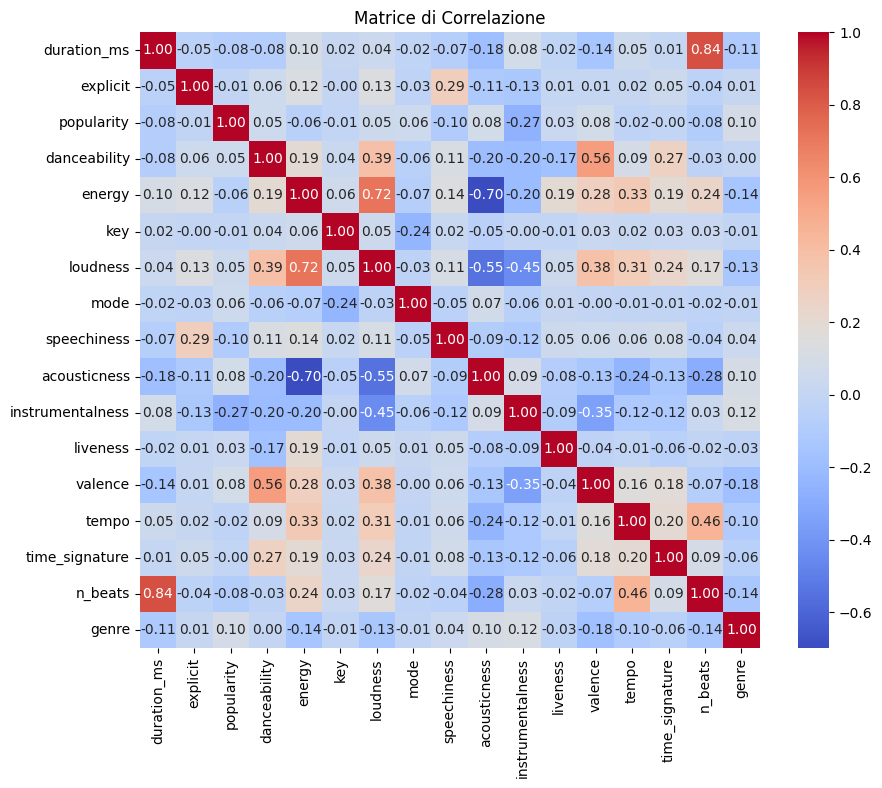

In [1106]:

plt.figure(figsize=(10, 8))
sns.heatmap( correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione')
plt.show()


In [1107]:
genre_num = df['genre'].tolist()

# Inizializza l'oggetto LabelEncoder
label_encoder = LabelEncoder()

# Trasforma la colonna in numeri
colonna_numerica = label_encoder.fit_transform(genre_num)

# Sostituisci la colonna nel DataFrame originale con quella numerica
df['genre'] = colonna_numerica

In [1108]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=100)

# Simple Regression

In [1109]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [1110]:
features = ['genre', 'valence', 'time_signature','tempo','energy','loudness','instrumentalness']

x_train = df_train[features].values
y_train = df_train["danceability"].values

x_test = df_test[features].values
y_test = df_test["danceability"].values

## Linear Regression

In [1111]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [1112]:
#reg.coef_ restituisce i coefficienti associati a ciascuna delle features nel modello di regressione lineare.
#Questi coefficienti rappresentano la relazione tra ciascuna feature e l'output previsto. 
print('Coefficients: \n', reg.coef_)

#restituisce l'intercetta del modello di regressione lineare
print('Intercept: \n', reg.intercept_)


Coefficients: 
 [ 3.44116886e-03  3.50562651e-01  5.90340993e-02 -2.75372952e-04
 -1.43711593e-01  1.20199288e-02  4.82883808e-02]
Intercept: 
 0.35667699098298844


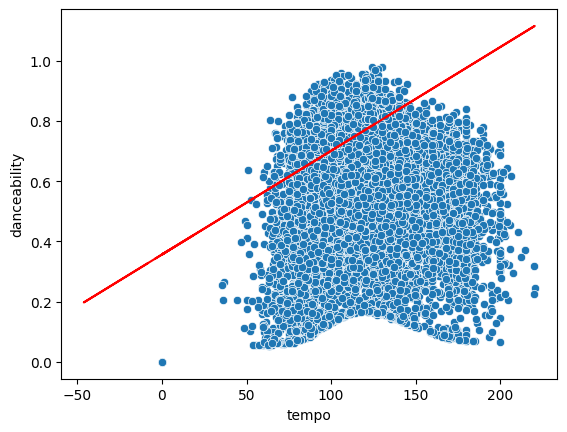

In [1113]:
sns.scatterplot(data=df_train, x="tempo", y="danceability")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")


In [1114]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.411
MSE: 0.022
MAE: 0.120


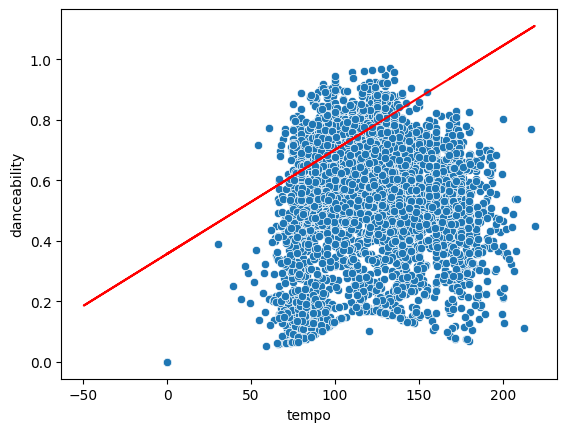

In [1115]:
sns.scatterplot(data=df_test, x="tempo", y="danceability")
plt.plot(x_test, reg.coef_[0]*x_test+reg.intercept_, c="red")

In [1116]:
reg = Ridge()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [ 3.43902809e-03  3.49996361e-01  5.90379132e-02 -2.75586440e-04
 -1.43231143e-01  1.20096710e-02  4.81151754e-02]
Intercept: 
 0.35660035882371044


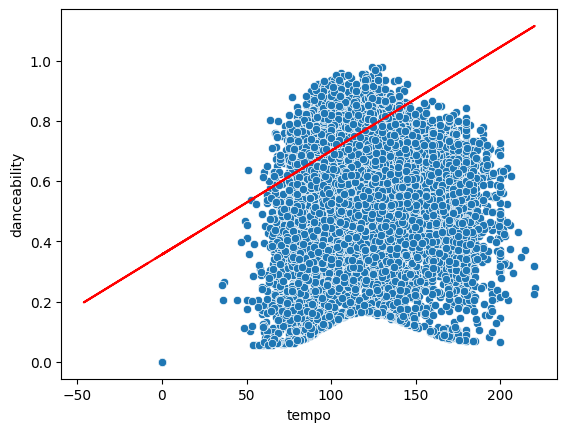

In [1117]:
sns.scatterplot(data=df_train, x="tempo", y="danceability")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

In [1118]:
reg = Lasso()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.  0.  0.  0.  0.  0. -0.]
Intercept: 
 0.5510393428571428


# Nonlinear regression

## Decision Tree Regressor

In [1119]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [1120]:
y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.367
MSE: 0.024
MAE: 0.118


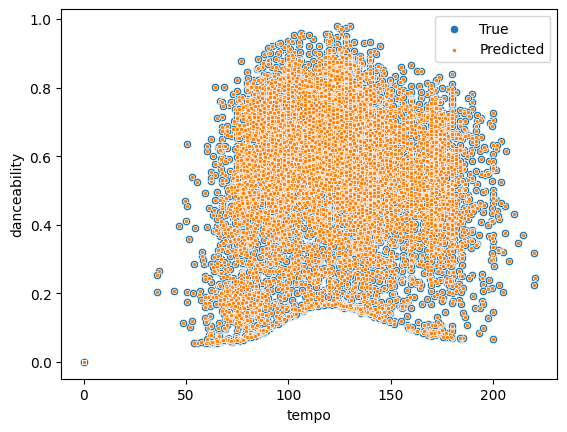

In [1121]:
sns.scatterplot(data=df_train, x="tempo", y="danceability", label="True")
sns.scatterplot(data=df_train, x="tempo", y=reg.predict(x_train), label="Predicted", marker=".")
plt.legend()
plt.show()

## KNN Regressor

In [1122]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor()
reg.fit(x_train, y_train)

KNeighborsRegressor()

In [1123]:
y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.475
MSE: 0.020
MAE: 0.109


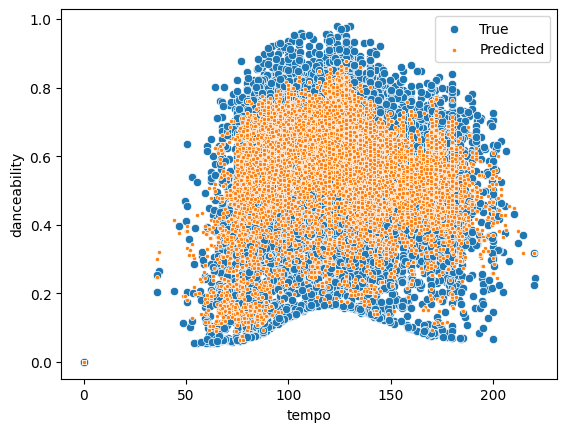

In [1124]:
sns.scatterplot(data=df_train, x="tempo", y="danceability", label="True")
sns.scatterplot(data=df_train, x="tempo", y=reg.predict(x_train), label="Predicted", marker=".")
plt.legend()
plt.show()